In [175]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
import itertools
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.metrics import normalized_mutual_info_score as nmi
from sklearn.metrics import adjusted_rand_score as ari
from sklearn.cluster import AgglomerativeClustering

In [5]:
data = loadmat('annthyroid.mat')

In [9]:
data

{'X': array([[  7.30000000e-01,   6.00000000e-04,   1.50000000e-02,
           1.20000000e-01,   8.20000000e-02,   1.46000000e-01],
        [  2.40000000e-01,   2.50000000e-04,   3.00000000e-02,
           1.43000000e-01,   1.33000000e-01,   1.08000000e-01],
        [  4.70000000e-01,   1.90000000e-03,   2.40000000e-02,
           1.02000000e-01,   1.31000000e-01,   7.80000000e-02],
        ..., 
        [  5.10000000e-01,   7.60000000e-04,   2.01000000e-02,
           9.00000000e-02,   6.70000000e-02,   1.34000000e-01],
        [  3.50000000e-01,   2.80000000e-03,   2.01000000e-02,
           9.00000000e-02,   8.90000000e-02,   1.01000000e-01],
        [  7.30000000e-01,   5.60000000e-04,   2.01000000e-02,
           8.10000000e-02,   9.00000000e-02,   9.00000000e-02]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Aug 18 14:56:12 2016',
 '__version__': '1.0',
 'y': array([[0],
        [0],
        [0],
        ..., 
        [0],
        

In [17]:
col_names = ['a','b','c','d','e','f']
all_data = pd.DataFrame(data['X'],columns=col_names)
all_data.head()

a        b      c      d      e      f
0  0.73  0.00060  0.015  0.120  0.082  0.146
1  0.24  0.00025  0.030  0.143  0.133  0.108
2  0.47  0.00190  0.024  0.102  0.131  0.078
3  0.64  0.00090  0.017  0.077  0.090  0.085
4  0.23  0.00025  0.026  0.139  0.090  0.153

In [19]:
y_truth = pd.DataFrame(data['y'],columns=['label'])
y_truth.head()

label
0      0
1      0
2      0
3      0
4      0

In [22]:
set(y_truth['label'])

{0, 1}

## Task 1.1

In [23]:
all_data0 = all_data.loc[y_truth['label']==0]
all_data1 = all_data.loc[y_truth['label']==1]
print (all_data0.shape,all_data1.shape,)

(6666, 6) (534, 6)


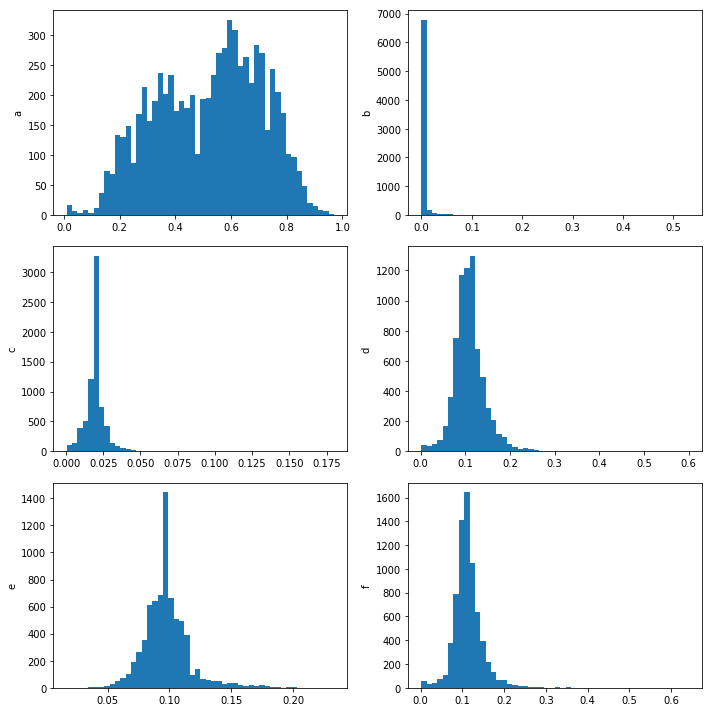

In [24]:
#Visualize the univariate distributions of all features, jointly
fig,ax = plt.subplots(3,2, figsize=(10,10))
p = 0
for i in range(3):
    for j in range(2):
        ax[i,j].hist(all_data[col_names[p]], bins=50)
        ax[i,j].set_ylabel(col_names[p])
        p+=1
#ax[12].set_xlabel('MEDV')

plt.tight_layout()
plt.show()
 

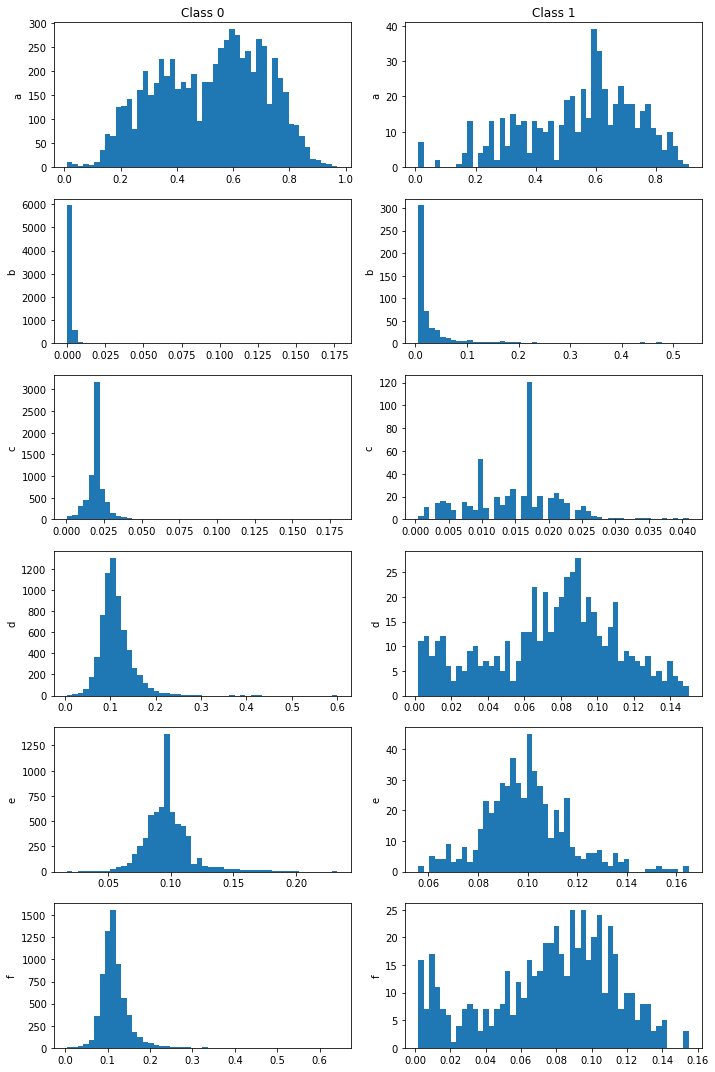

In [25]:
#Visualize the univariate distributions of all features per class.
fig,ax = plt.subplots(6,2, figsize=(10,15))
p = 0
for i in range(6):
    for j in range(2):
        if j == 0:
            ax[i,j].hist(all_data0[col_names[p]], bins=50)
            ax[i,j].set_ylabel(col_names[p])
        else:
            ax[i,j].hist(all_data1[col_names[p]], bins=50)
            ax[i,j].set_ylabel(col_names[p])                    
    p+=1

ax[0,0].set_title('Class 0')
ax[0,1].set_title('Class 1')

plt.tight_layout()
plt.show()

In [44]:
# all_data_x = all_data.loc[:,all_data.columns != 'ann_th']
# all_data_y = pd.DataFrame(all_data.loc[:,all_data.columns == 'ann_th'])

(7200, 2)


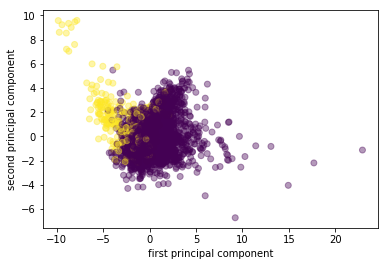

In [40]:
pca_scaled = make_pipeline(StandardScaler(), PCA(n_components=2))
all_data_pca = pca_scaled.fit_transform(all_data)
print(all_data_pca.shape)
plt.scatter(all_data_pca[:, 0], all_data_pca[:, 1], c=y_truth['label'],alpha = 0.4)
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.show()

In [47]:
scaler = StandardScaler()
all_data_scaled = scaler.fit_transform(all_data) #scaling data
pca2 = PCA(n_components=6)
pca2.fit_transform(all_data_scaled)
pca2.explained_variance_

array([ 2.29601111,  1.38494736,  0.91098472,  0.81249316,  0.57237237,
        0.02402473])

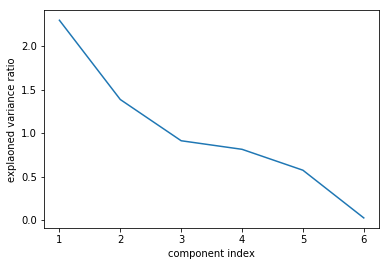

In [48]:
plt.plot(range(1,7),pca2.explained_variance_)
plt.xlabel("component index")
plt.ylabel("explaoned variance ratio")
plt.xticks(np.arange(1, 7, step=1))
plt.show()

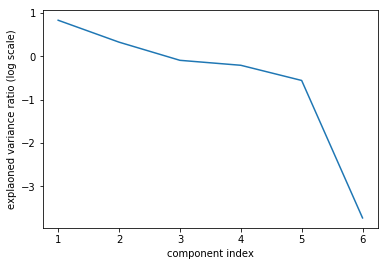

In [49]:
plt.plot(range(1,7),np.log(pca2.explained_variance_))
plt.xlabel("component index")
plt.ylabel("explaoned variance ratio (log scale)")
plt.xticks(np.arange(1, 7, step=1))
plt.show()

As seen from above 2 plots, 5 components seem to cover major variance. Therfore, we can use 5 components to reduce our data


## Task 1.2
Visualize the data using t-SNE. See if tuning the perplexity parameter helps obtaining a
better visualization.

In [51]:
tsne = TSNE()
all_data_sc_tsne = tsne.fit_transform(all_data_scaled)
all_data_sc_tsne

array([[-51.26181412,  32.24555588],
       [ 52.93050003,  34.06492996],
       [  5.26826572,  37.53252411],
       ..., 
       [  2.89794707, -28.22206306],
       [ 47.72912598, -40.4499054 ],
       [-27.30810356, -40.97901154]], dtype=float32)

(7200, 2)


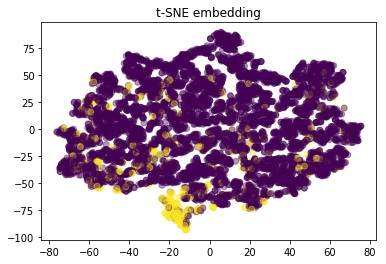

In [52]:
print(all_data_sc_tsne.shape)
plt.scatter(all_data_sc_tsne[:, 0], all_data_sc_tsne[:, 1],c=y_truth['label'],alpha = 0.4)
plt.title('t-SNE embedding')
plt.show()

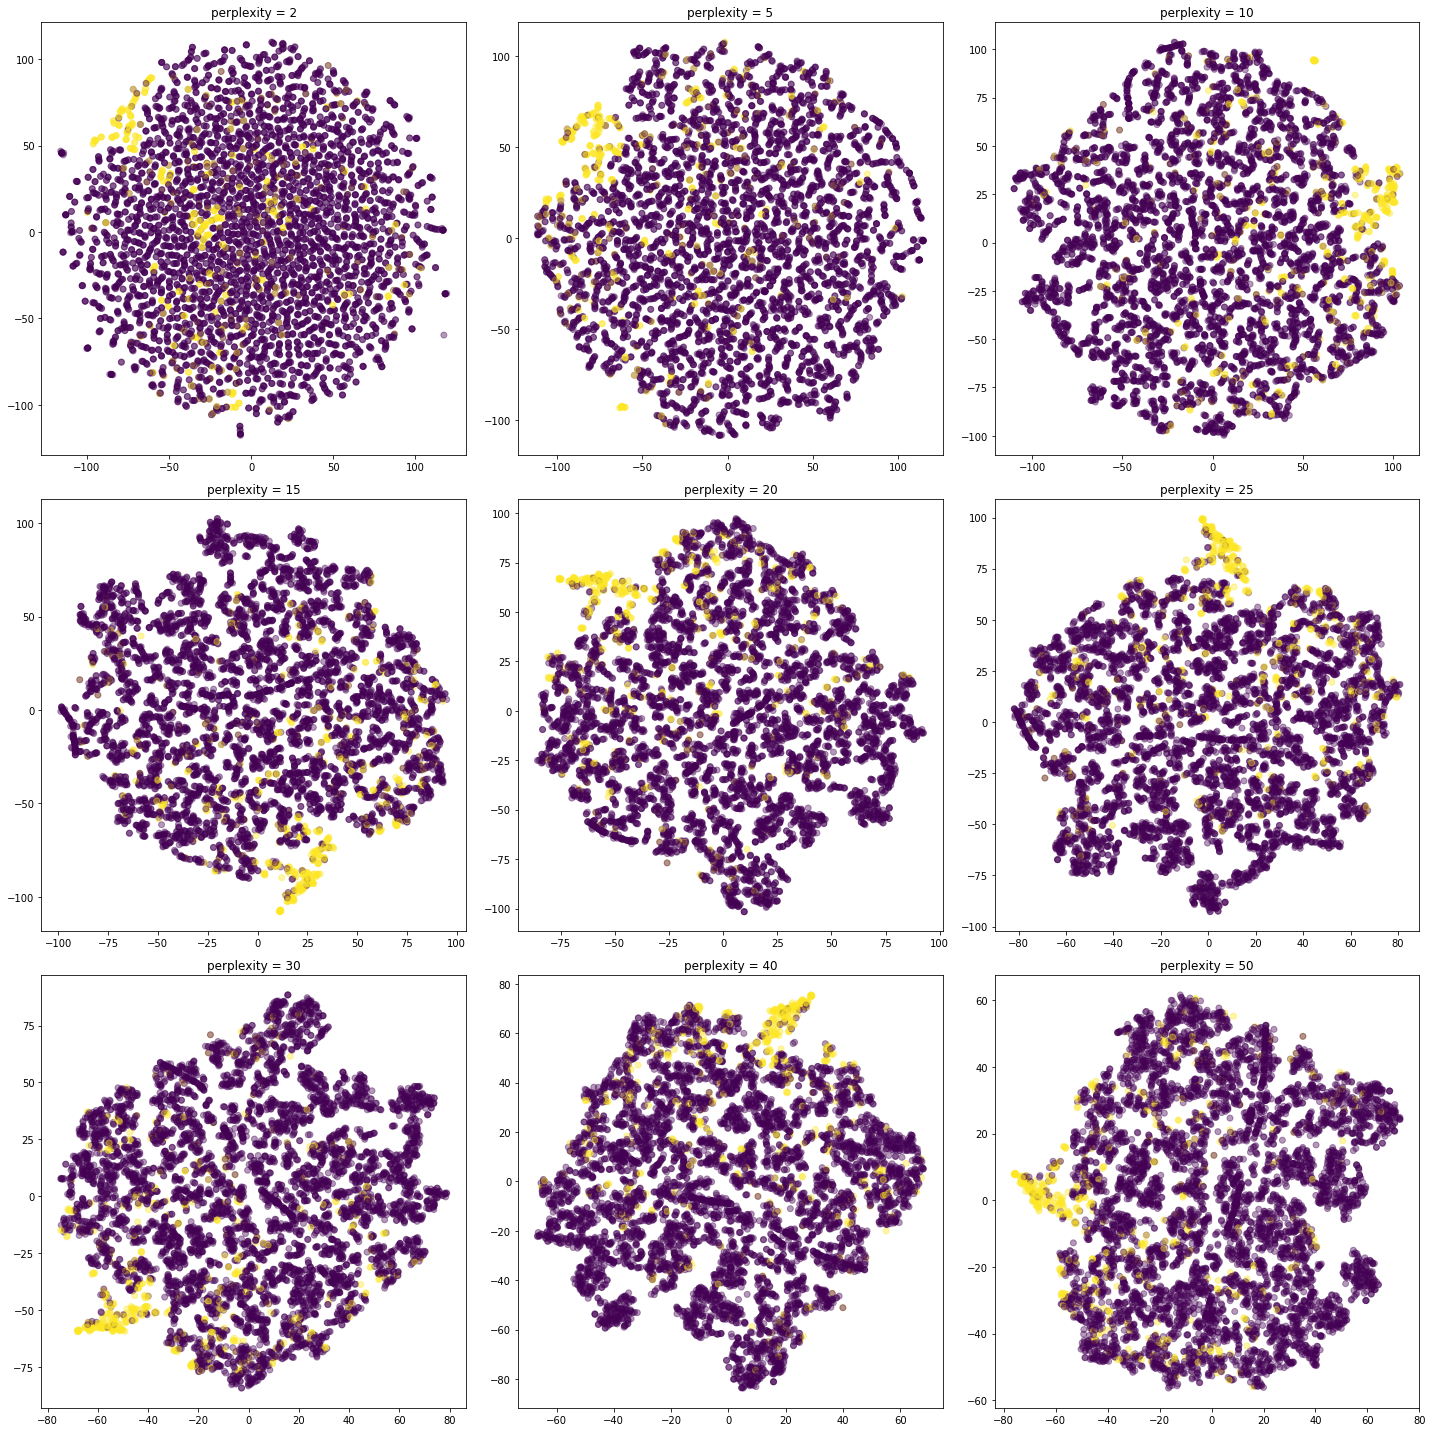

In [126]:
perplexity = [2,5,10,15,20,25,30,40,50]
p = 0
fig,ax = plt.subplots(3,3, figsize=(20,20))
for i in range(3):
    for j in range(3):
        all_data_sc_tsne = TSNE(perplexity=perplexity[p]).fit_transform(all_data_scaled)
        ax[i,j].scatter(all_data_sc_tsne[:, 0], all_data_sc_tsne[:, 1],c=y_truth['label'],alpha = 0.4)
        ax[i,j].set_title('perplexity = '+str(perplexity[p]))
        p+=1
plt.tight_layout()
plt.show()
 

Yes, adjusting perplexity helps a bit in visualizing data but still its not the best.

## Task 2.1

2.1: Use KMeans, Agglomerative Clustering and DBSCAN to cluster the data. For each
algorithm, try to manually tune the parameters for a reasonable outcome and document how
you tuned the parameters. In particular pay attention to the sizes of the clusters created.
Create a dendrogram for agglomerative clustering (the truncate_mode='level' might be useful).
Manually inspect the outcomes as good as you can and identify if any of the resulting clusters
are semantically meaningful (as far as you can tell)

In [234]:
km_dict = {}
clusters = [2,3,4,5,6]
for i in clusters:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(all_data_scaled)
    km_dict['km'+str(i)] = km
    print(km.cluster_centers_.shape)
    print(km.labels_.shape)
    print('sum of sq. distances : ',km.inertia_)

(2, 6)
(7200,)
sum of sq. distances :  35401.8381629
(3, 6)
(7200,)
sum of sq. distances :  30075.6213259
(4, 6)
(7200,)
sum of sq. distances :  25755.2933391
(5, 6)
(7200,)
sum of sq. distances :  22836.1289766
(6, 6)
(7200,)
sum of sq. distances :  20368.8827189


In [232]:
# km_dict['km4'].cluster_centers_

In [230]:
# lst = km_dict['km4'].cluster_centers_
# [item[[1,2]] for item in lst]


In [231]:
# vor = Voronoi([item[[4,5]] for item in lst])
# plt2 = voronoi_plot_2d(vor)
# plt2.show()


In [85]:
comb = []
for i in itertools.combinations(range(6), 2):
    comb.append(i)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]


clusters= 2


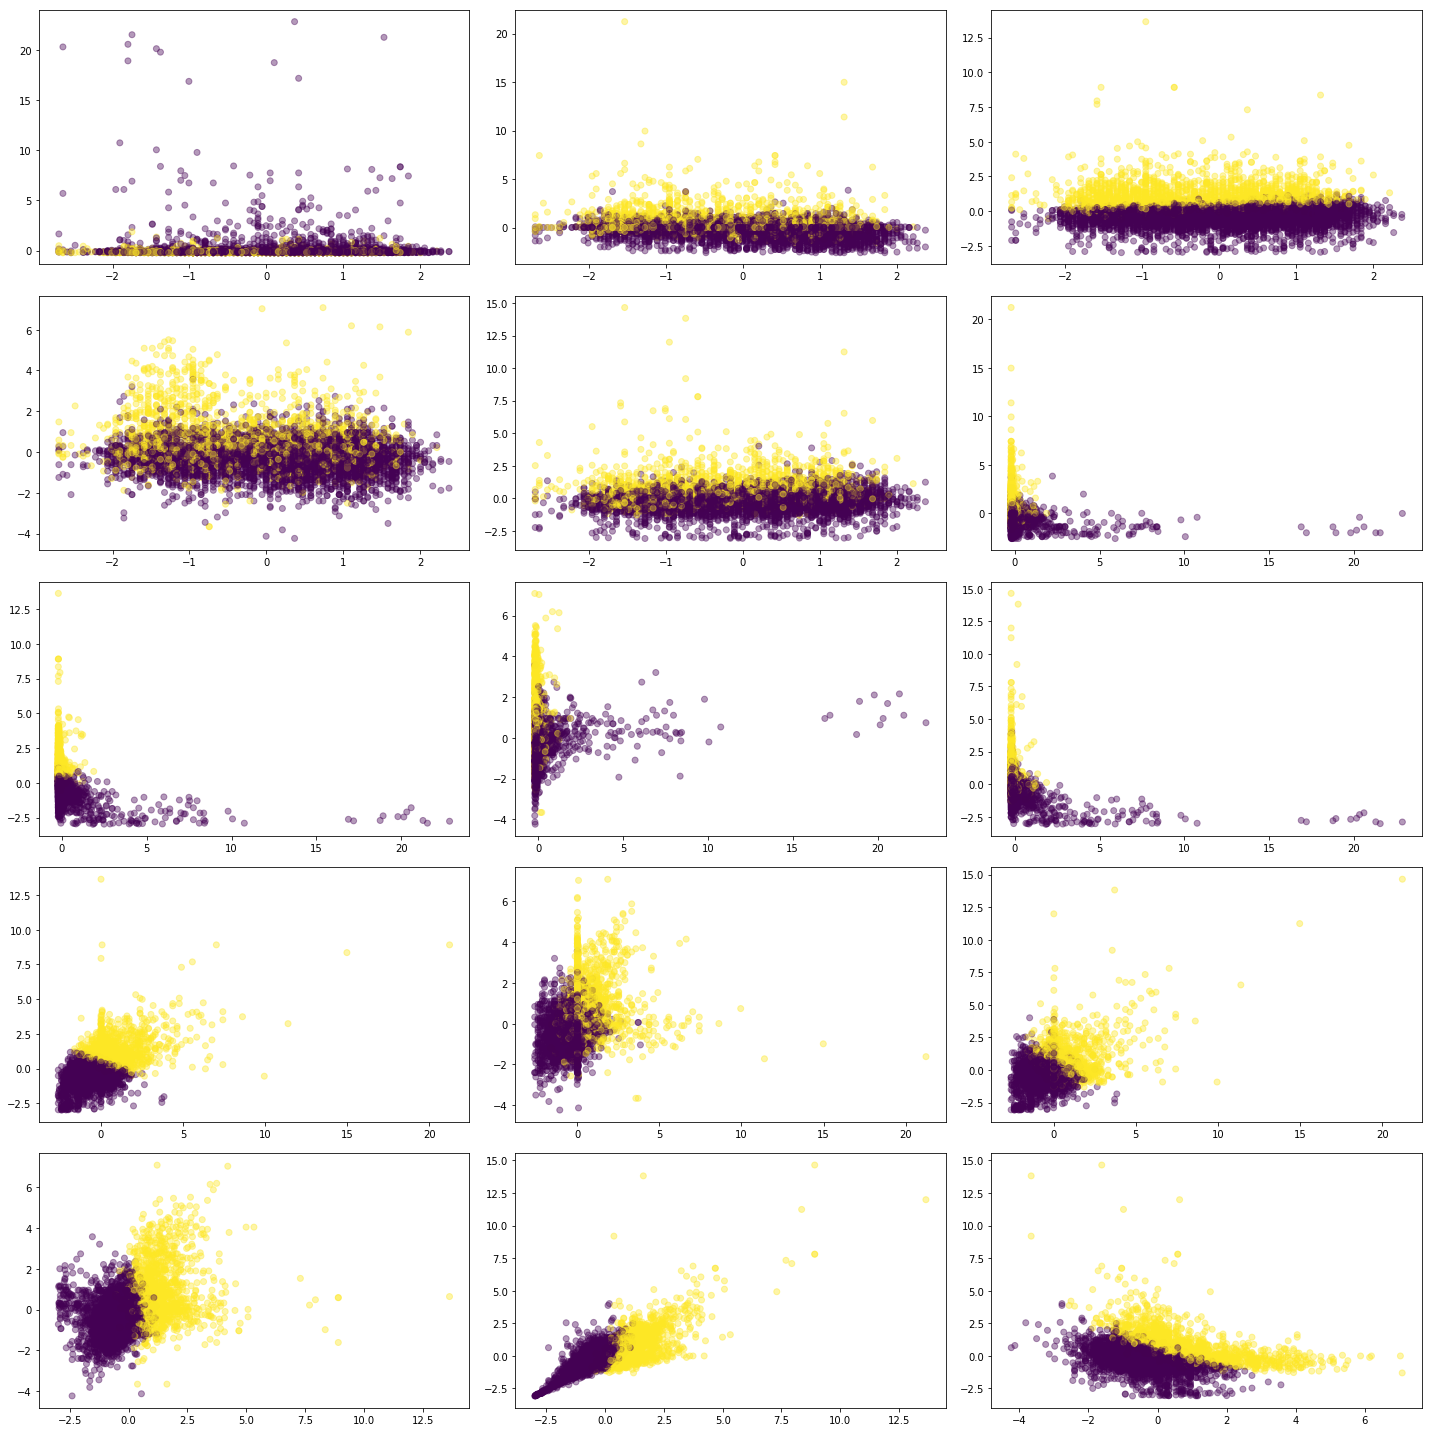

clusters= 3


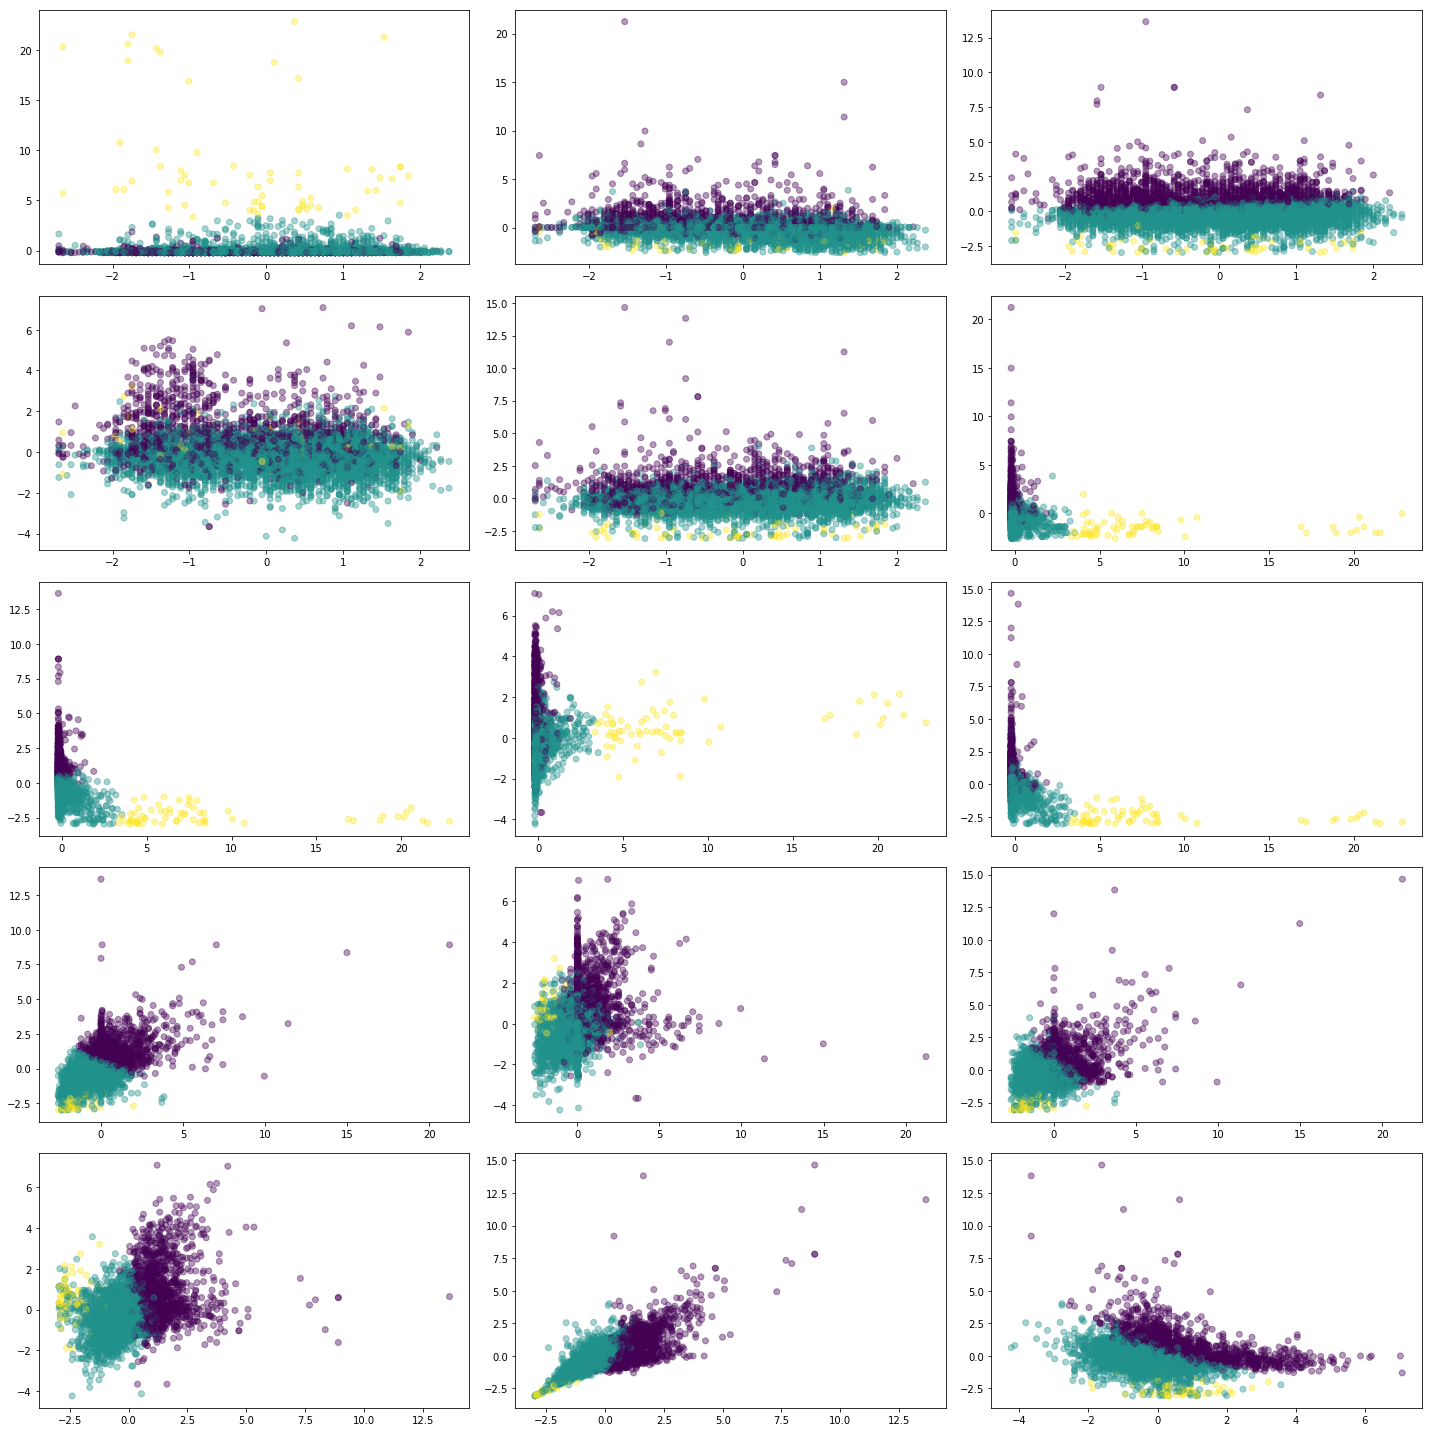

clusters= 4


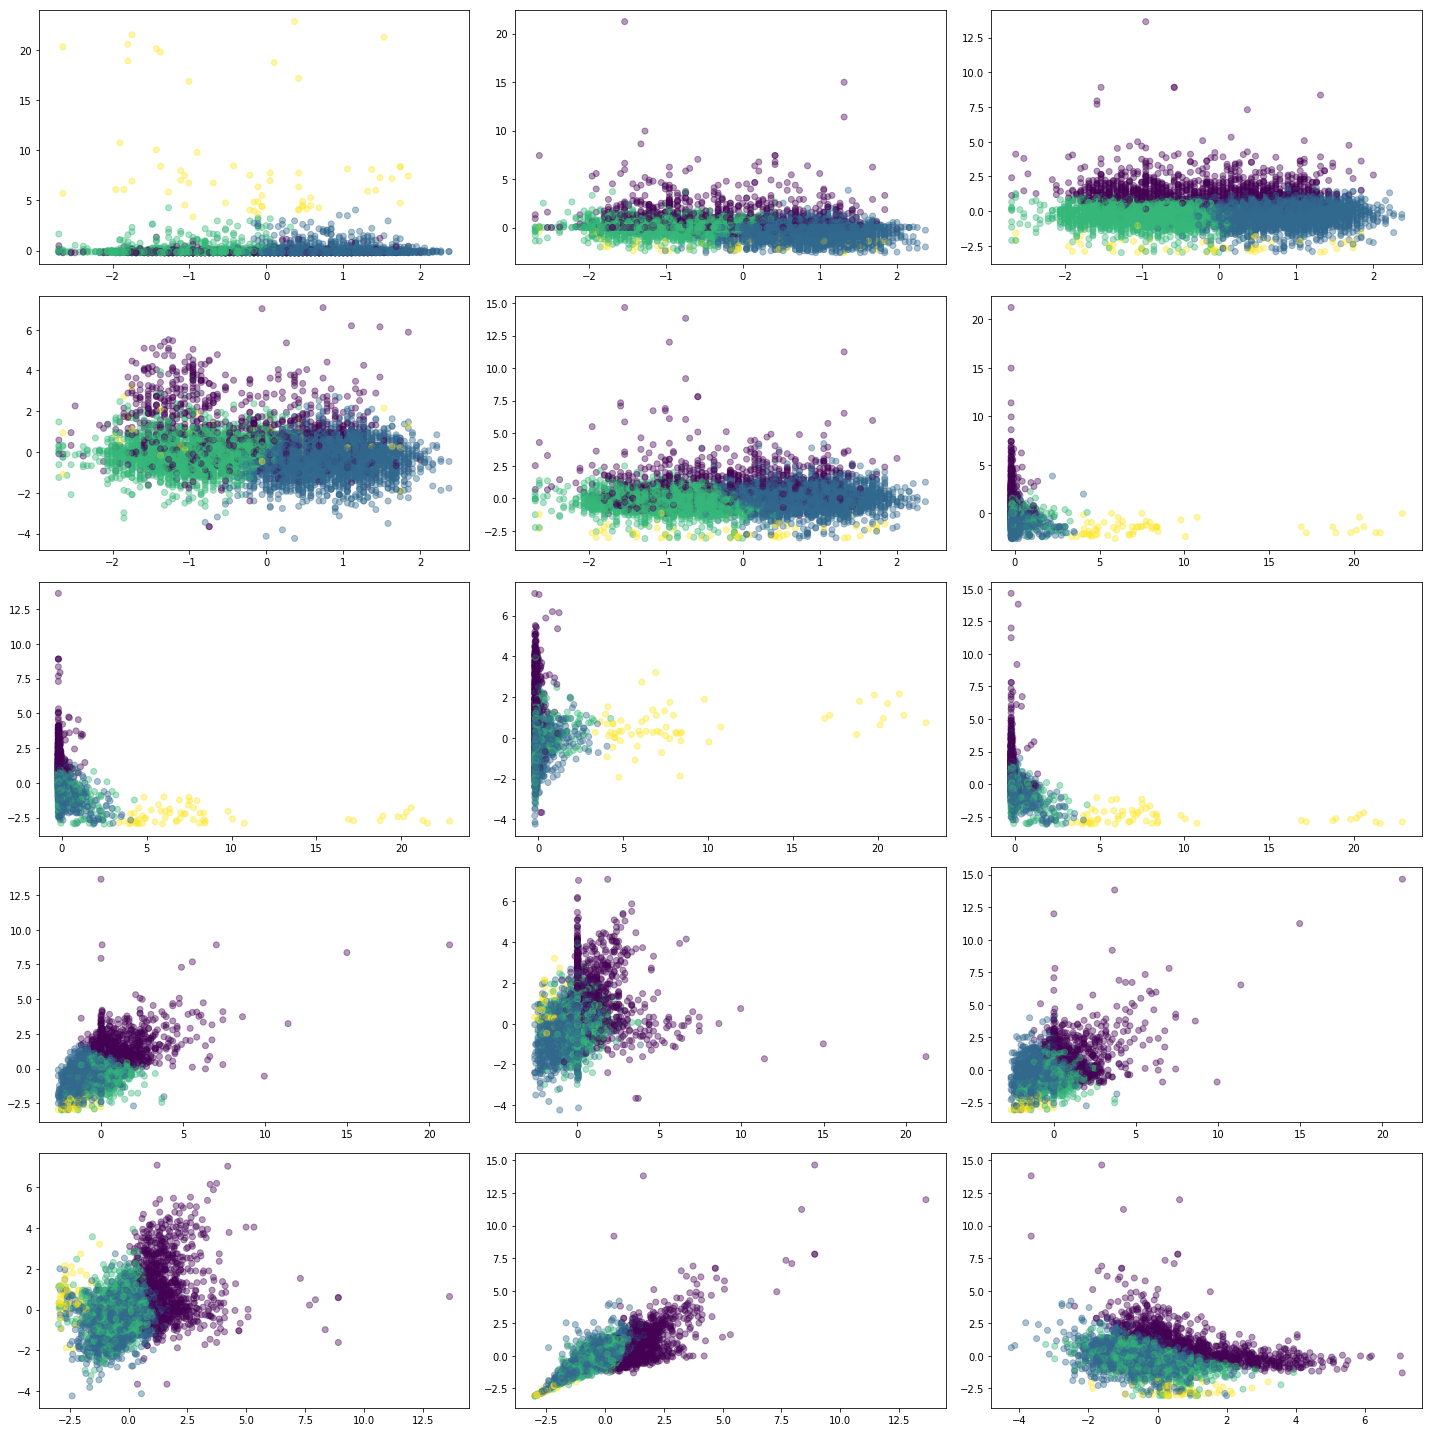

clusters= 5


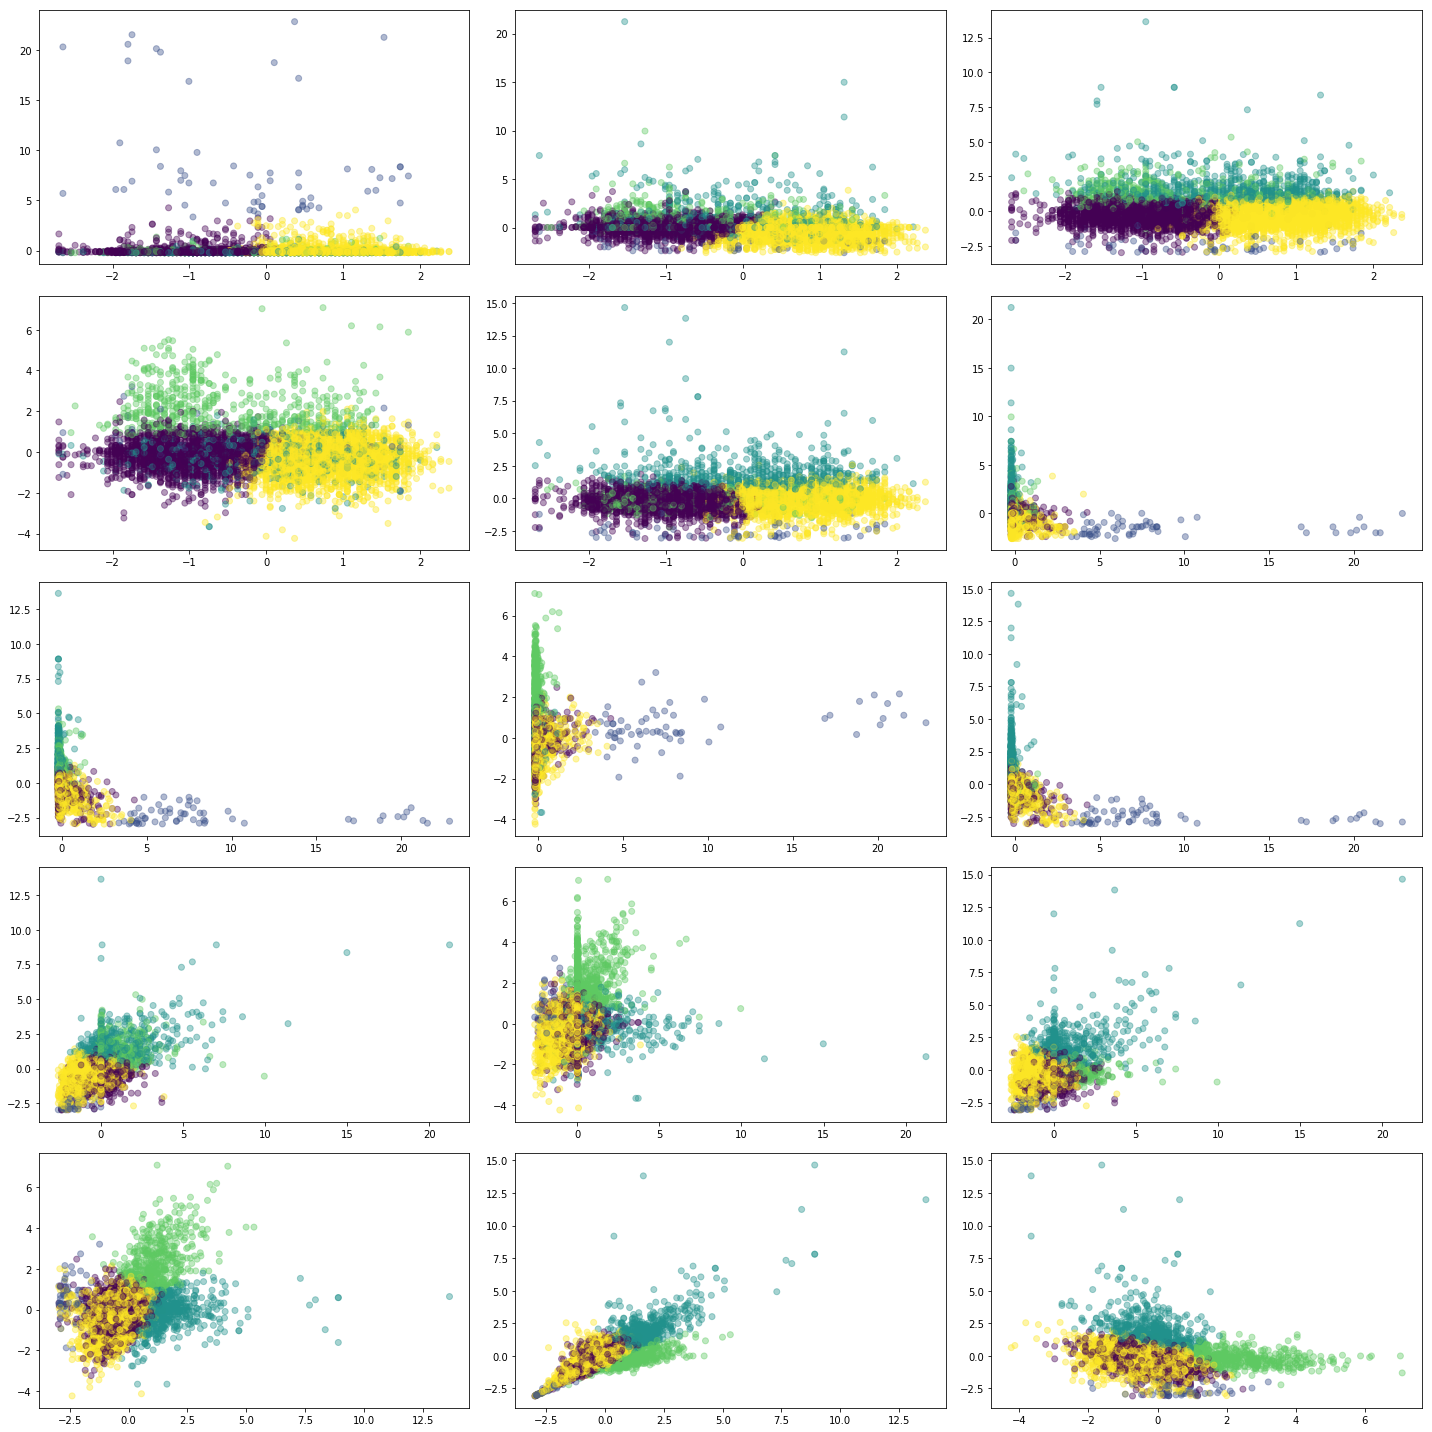

In [93]:

k = [2,3,4,5]

for q in k:
    print ('clusters=',q)
    p = 0
    fig,ax = plt.subplots(5,3, figsize=(20,20))
    for i in range(5):
        for j in range(3):
            ax[i,j].scatter(all_data_scaled[:, comb[p][0]], all_data_scaled[:, comb[p][1]],
                            c=km_dict['km'+str(q)].labels_,alpha = 0.4)
    #        ax[i,j].set_title('perplexity = '+str(perplexity[p]))
            p+=1
    plt.tight_layout()
    plt.show()

On plotting all combinations of scatter plots with k = 2,3,4,5 clusters, I observed k=2 seems to be a clustering the data in well fashion. So, in KMeans I would choose 2 clusters.

lets do PCA on 2 components and run KMeans with k=2 and see the scatter plot

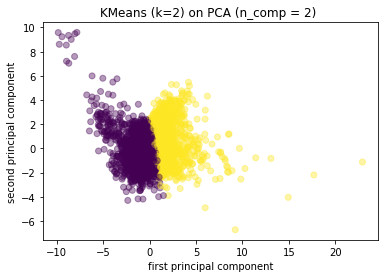

In [237]:
pca = PCA(n_components=2)
all_data_scaled_pca = pca.fit_transform(all_data_scaled)
plt.scatter(all_data_scaled_pca[:, 0], all_data_scaled_pca[:, 1], c=km_dict['km2'].labels_,alpha = 0.4)
plt.title('KMeans (k=2) on PCA (n_comp = 2) ')
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.show()

In [210]:
#agglomerative clustering sklearn package
ac_dict={}
clusters = [2,3,4,5,6]
for i in clusters:
    ac = AgglomerativeClustering(n_clusters = i,linkage='ward')
    ac.fit(all_data_scaled)
    ac_dict['ac'+str(i)]=ac

In [128]:
#agglomerative clustering
z = linkage(all_data_scaled, 'ward')

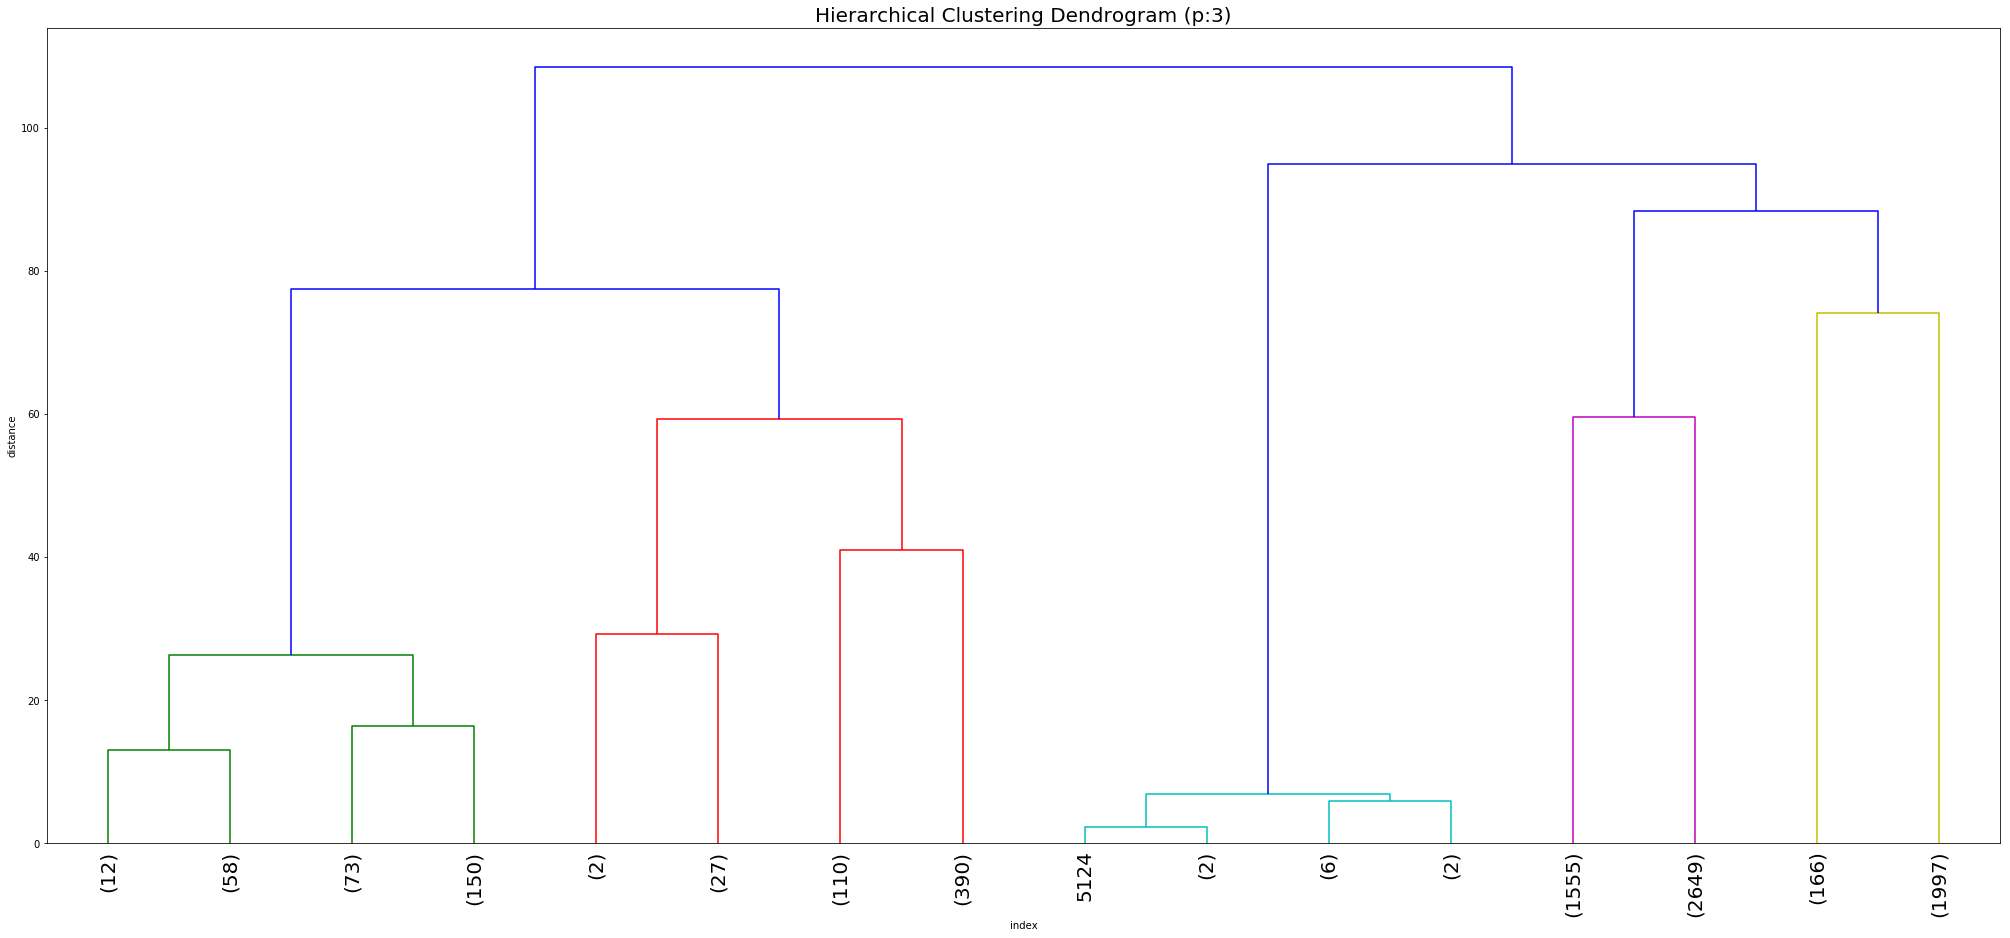

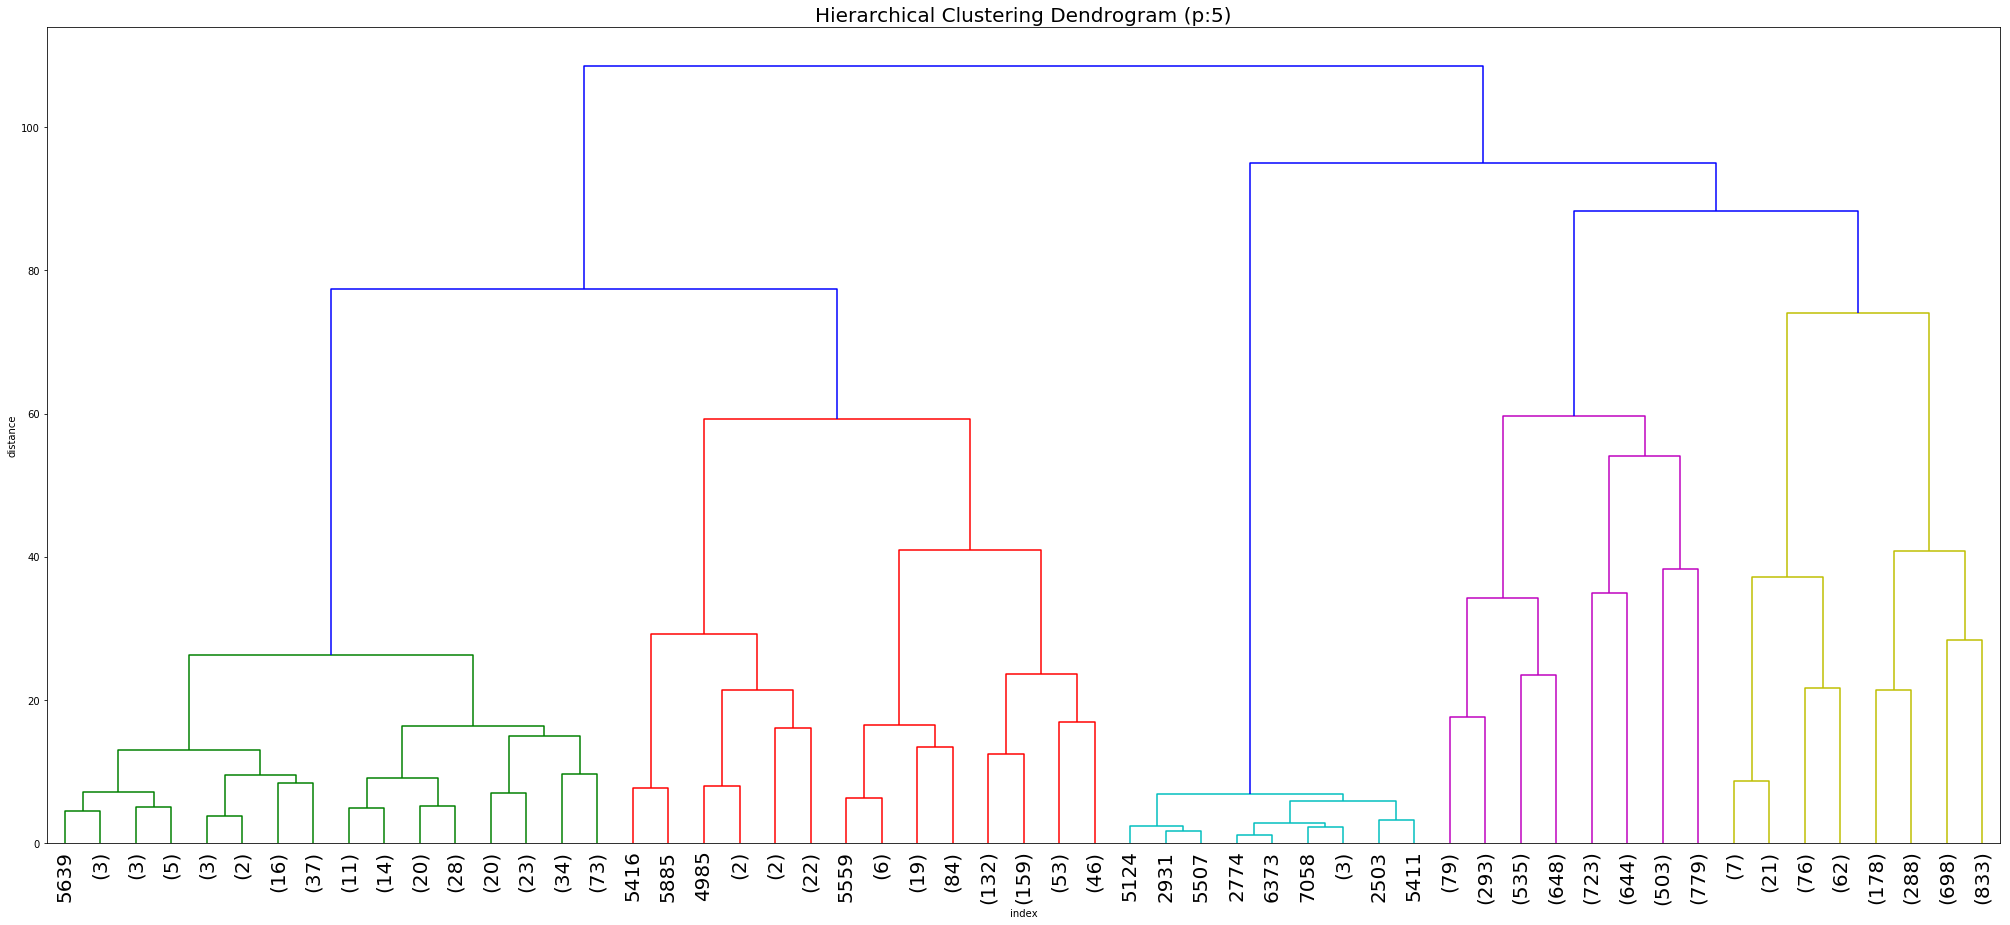

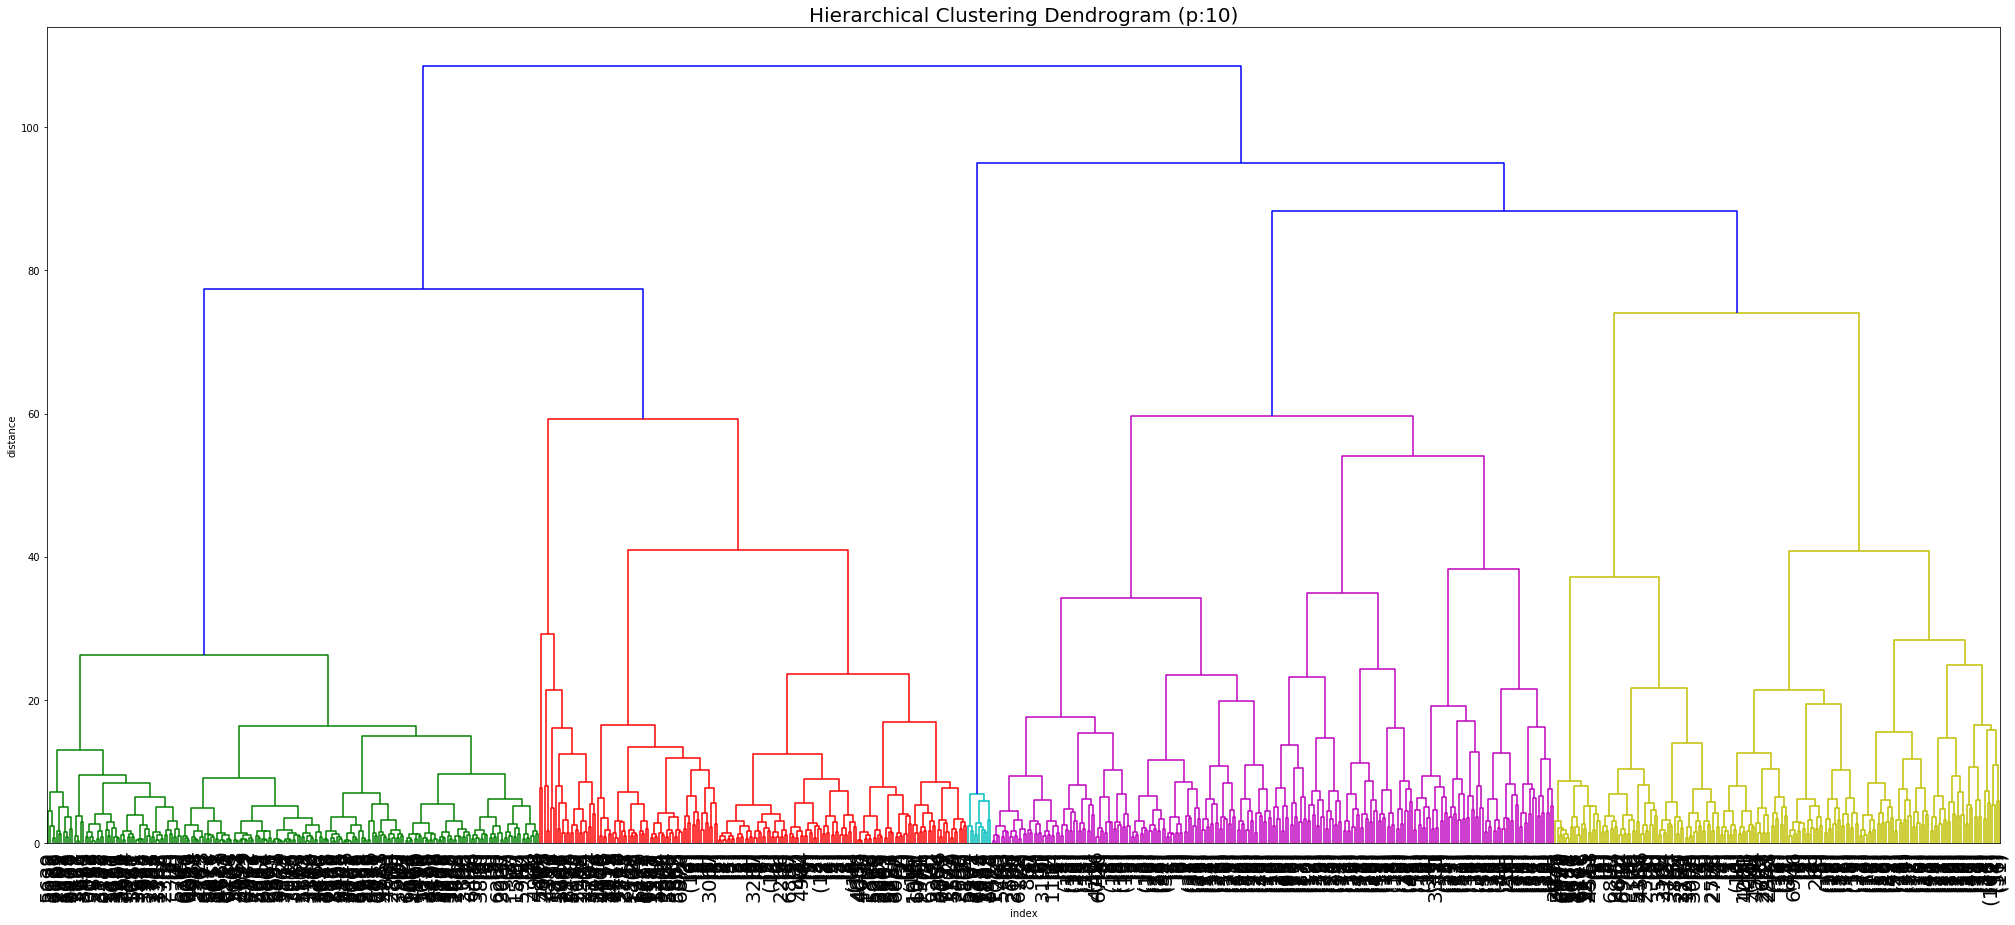

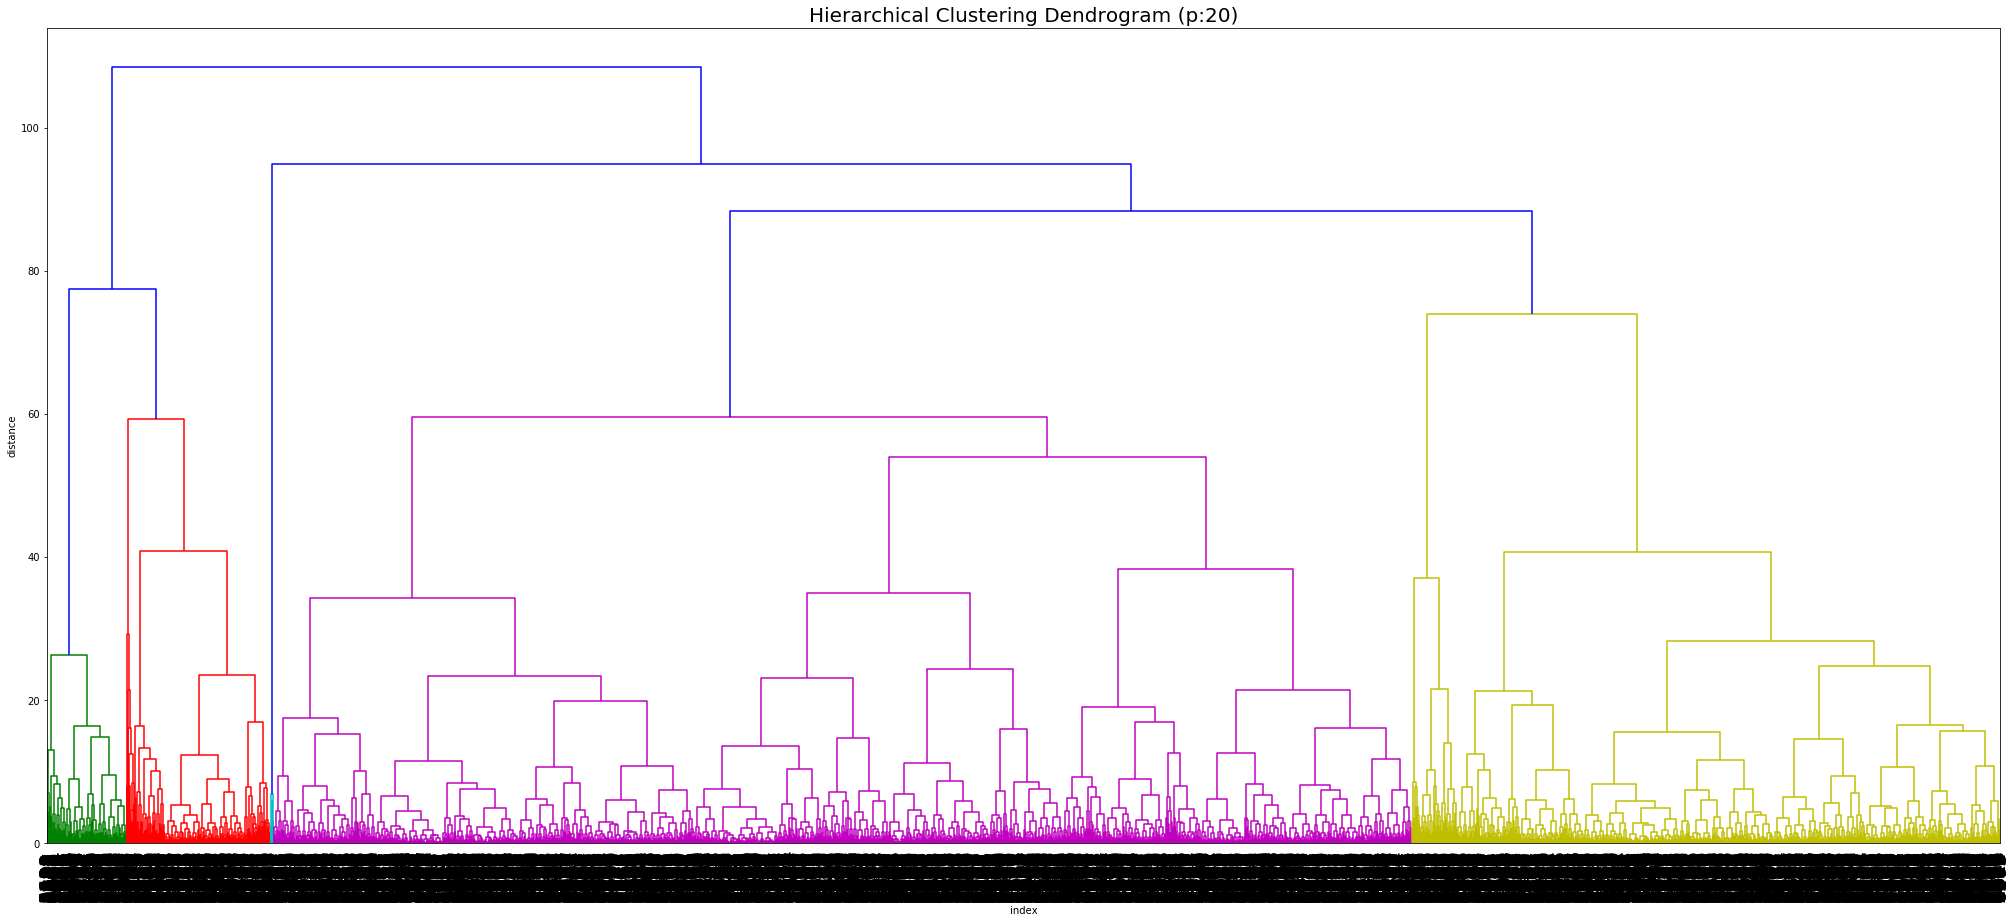

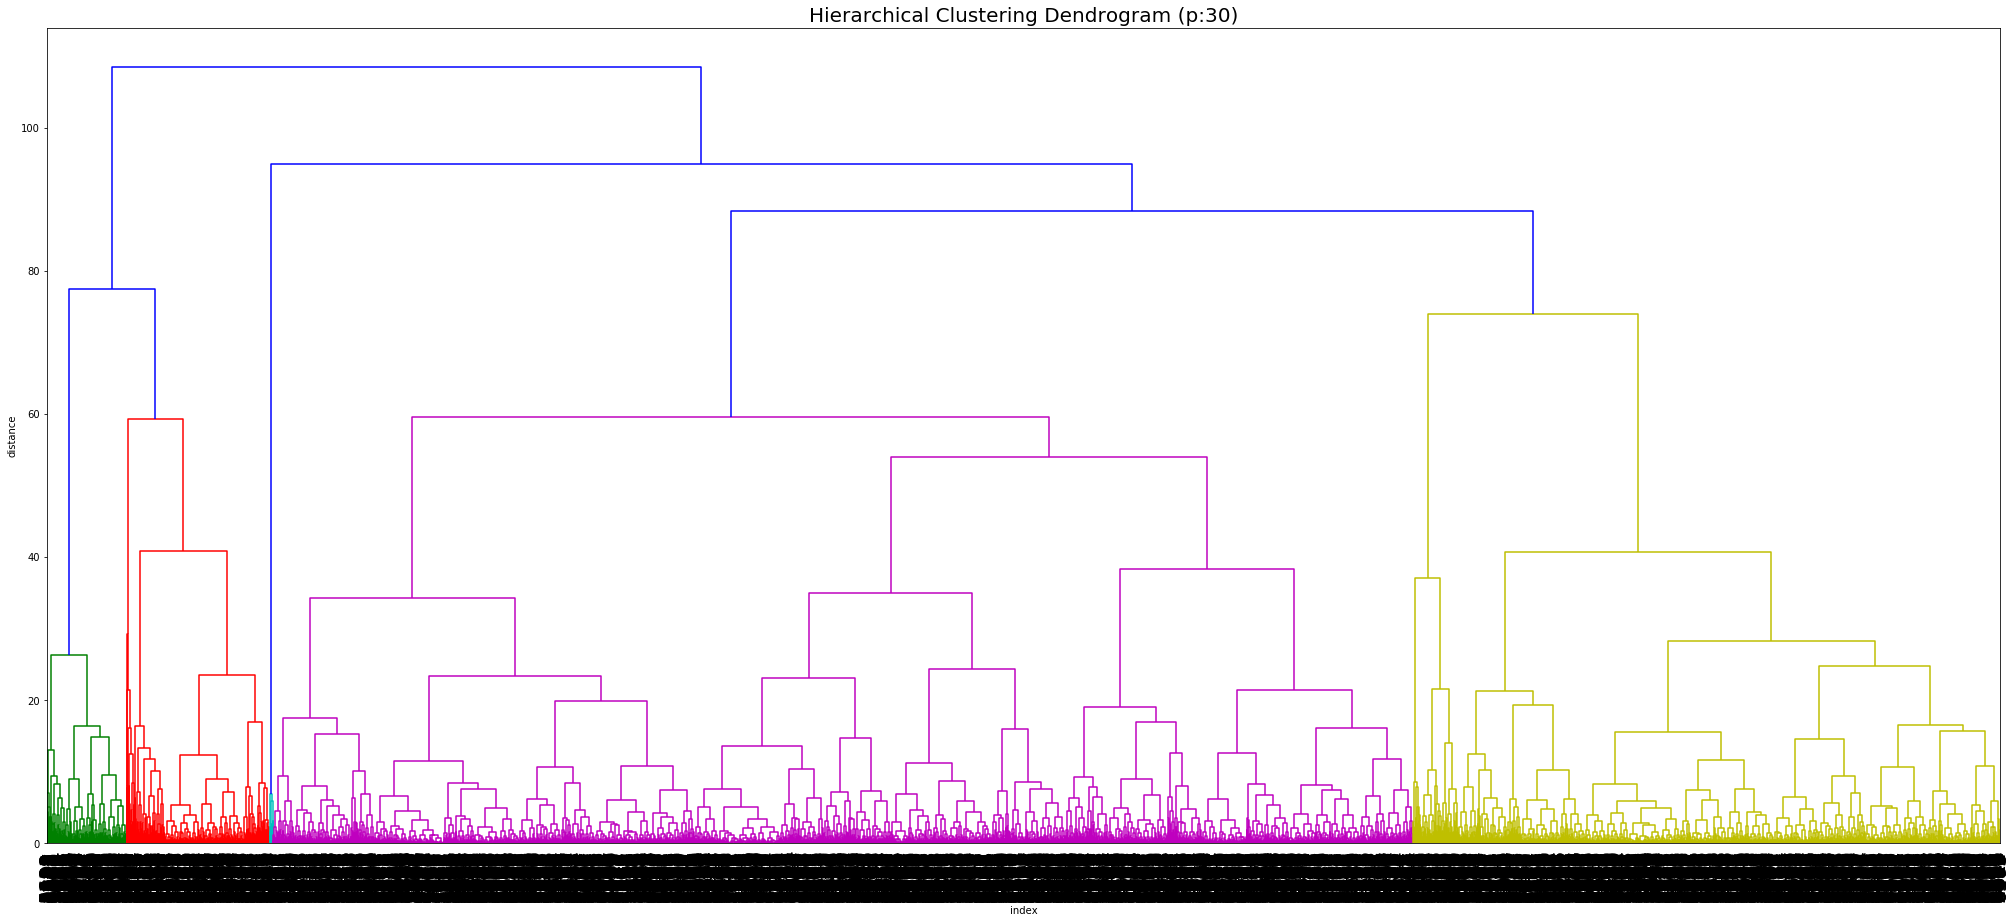

In [244]:
for i in [3,5,10,20,30]:
    plt.figure(figsize=(35, 15))
    plt.title('Hierarchical Clustering Dendrogram (p:'+str(i)+')',fontsize=20)
    plt.xlabel('index')
    plt.ylabel('distance')
    dendrogram(
        z,
        truncate_mode='level',
        p=i,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=20.,  # font size for the x axis labels
    )
    plt.show()

I ran the dendogram plots over different p-values ([3,5,10,20,30]) i.e. level. Through observation, I can identify 3 clusters in these plots. 

In [258]:
#DBSCAN
db_dict = {}
eps = [1,1.5,2,2.5,3]
min_samples = [2,3,4,5,6]
for i in eps:
    for j in min_samples:
        db = DBSCAN(eps=i, min_samples=j).fit(all_data_scaled)
        print('No. of Noise Points')
        print('eps = ',i,' and min_samples = ',j,' ',sum(db.labels_ ==-1))
        print('No. of non noise and non zero class:')
        print('eps = ',i,' and min_samples = ',j,' ',sum(db.labels_ !=0)-sum(db.labels_ ==-1))
        print(set(db.labels_))
        db_dict['db'+str(i)+str(j)]=db
#_predict

No. of Noise Points
eps =  1  and min_samples =  2   179
No. of non noise and non zero class:
eps =  1  and min_samples =  2   68
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, -1}
No. of Noise Points
eps =  1  and min_samples =  3   213
No. of non noise and non zero class:
eps =  1  and min_samples =  3   34
{0, 1, 2, 3, 4, 5, 6, 7, 8, -1}
No. of Noise Points
eps =  1  and min_samples =  4   244
No. of non noise and non zero class:
eps =  1  and min_samples =  4   16
{0, 1, 2, 3, -1}
No. of Noise Points
eps =  1  and min_samples =  5   277
No. of non noise and non zero class:
eps =  1  and min_samples =  5   11
{0, 1, 2, -1}
No. of Noise Points
eps =  1  and min_samples =  6   303
No. of non noise and non zero class:
eps =  1  and min_samples =  6   17
{0, 1, 2, -1}
No. of Noise Points
eps =  1.5  and min_samples =  2   59
No. of non noise and non zero class:
eps =  1.5  and min_samples =  2   32
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1}
No

When I ran with eps = 0.1 and 0.5, the no. of noise points ran into thousands. Because of this I have started eps minimum value as 1

* eps = [1,1.5,2,2.5,3]
* min_samples = [2,3,4,5,6]


* The above mentioned combination of eps and min_value are taken to observe number of noise points. Larger eps seems to produce lower noise points.
* Going through all possible labels manually, DBSCAN results 2 or 3 size clusters (other than noise points).
* On further analysis on number of data points in the clusters and noise sets, eps with 1 and min_samples = 6 seems to be better settings for DBSCAN.

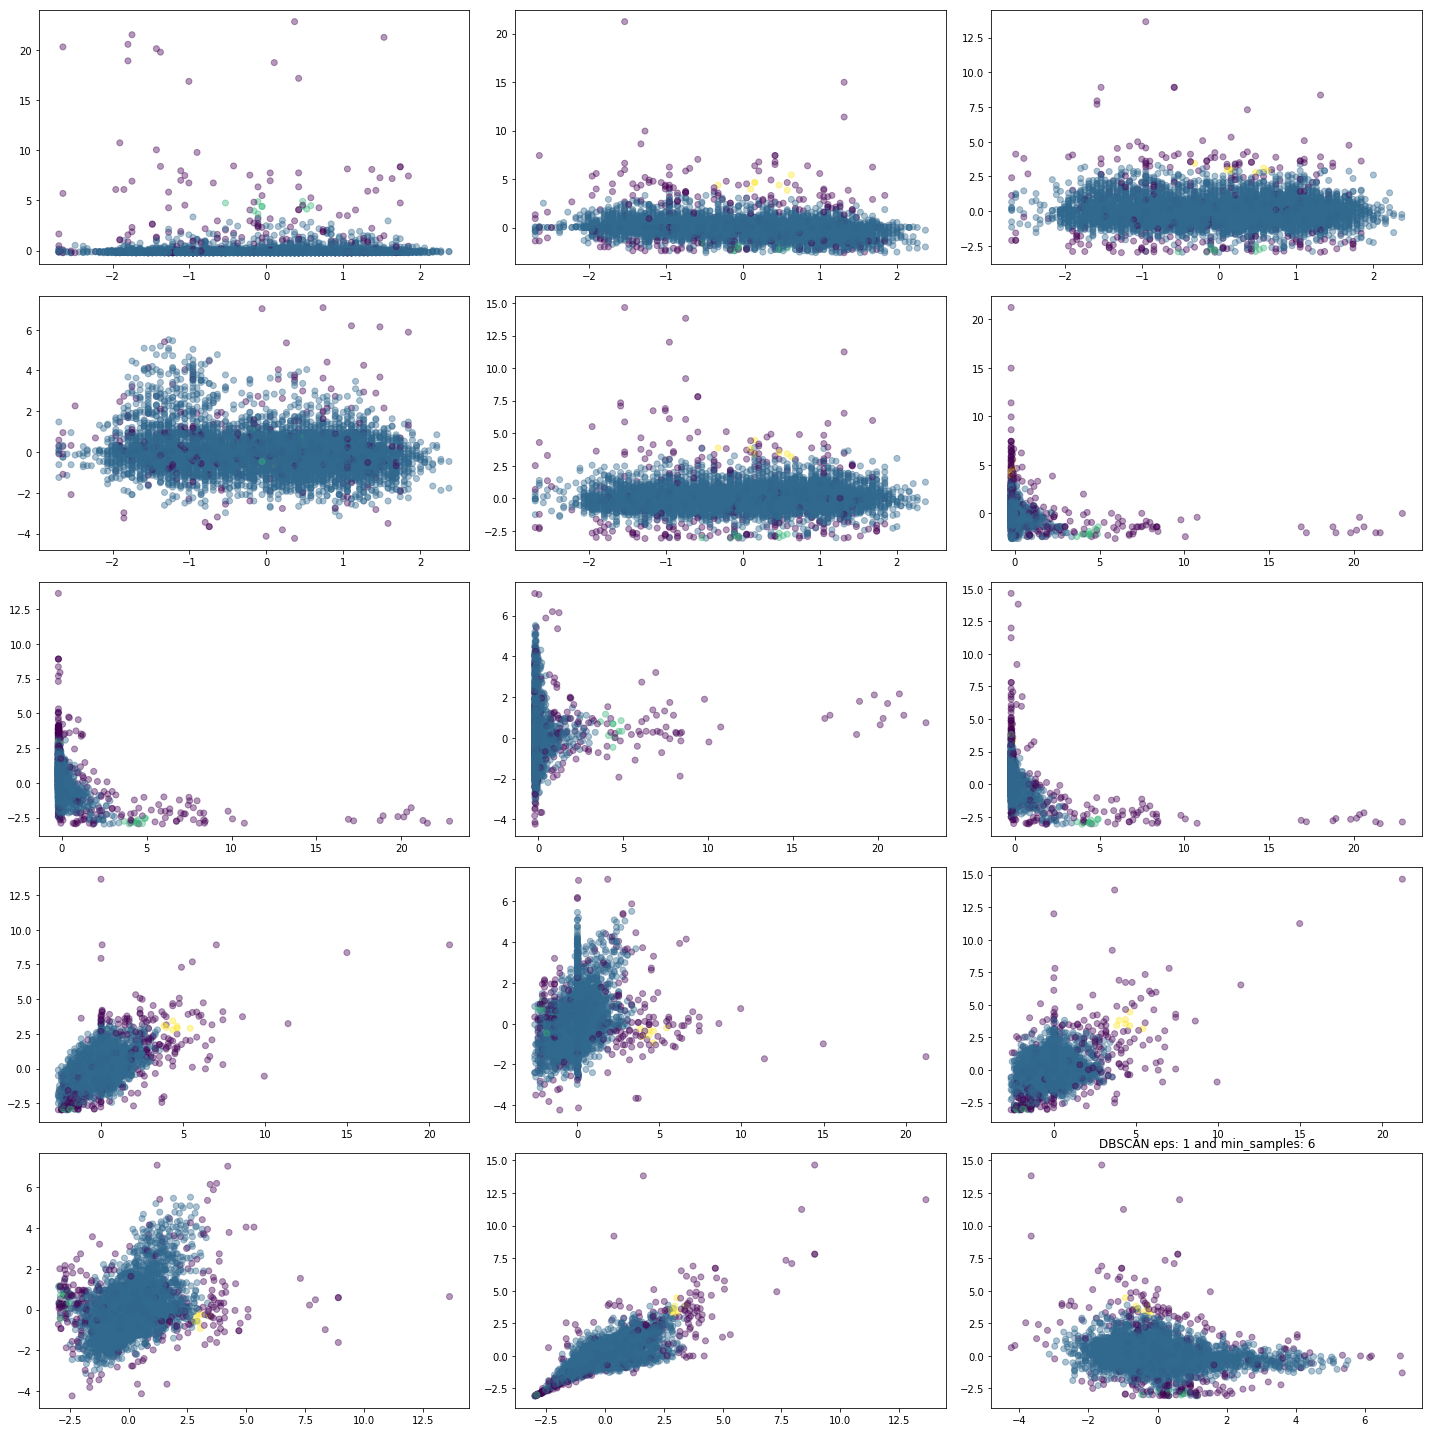

In [260]:
#DBSCAN with eps=1 and min_samples = 6
p = 0
fig,ax = plt.subplots(5,3, figsize=(20,20))
for i in range(5):
    for j in range(3):
        ax[i,j].scatter(all_data_scaled[:, comb[p][0]], all_data_scaled[:, comb[p][1]],
                        c=db_dict['db16'].labels_,alpha = 0.4)
#        ax[i,j].set_title('perplexity = '+str(perplexity[p]))
        p+=1
plt.tight_layout()
plt.title('DBSCAN eps: 1 and min_samples: 6')
plt.show()

## Task 2.2
2.2: Use the known ground truth labels of the outlier vs inlier class to evaluate your clustering
approaches using NMI and ARI scores. How well did they do? Can you adjust parameters so
they can detect the outliers better?

In [168]:
y_truth.head()

label
0      0
1      0
2      0
3      0
4      0

In [195]:
#K-Means scoring
km_nmi = []
km_ari = []
for i in km_dict:
    km_nmi.append(nmi(y_truth['label'],km_dict[i].predict(all_data_scaled)))
    km_ari.append(ari(y_truth['label'],km_dict[i].predict(all_data_scaled)))

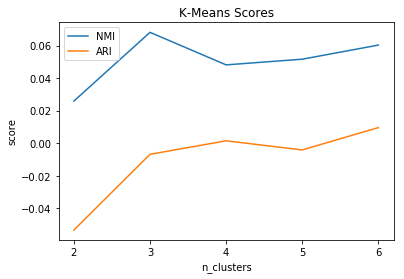

In [261]:
plot1, = plt.plot(clusters, km_nmi)
plot2, = plt.plot(clusters,km_ari)
plt.legend([plot1,plot2],["NMI", "ARI"])
plt.xlabel("n_clusters")
plt.ylabel("score")
plt.title('K-Means Scores')
plt.xticks(np.arange(2, 7, step=1))
plt.show()

The above plot provides the variation of NMI and ARI for different n_clusters and k=3 seems to be giving optimal score

In [213]:
#Agglomerative Clustering (with ward linkage) 
ac_nmi = []
ac_ari = []
for i in ac_dict:
    ac_nmi.append(nmi(y_truth['label'],ac_dict[i].fit_predict(all_data_scaled)))
    ac_ari.append(ari(y_truth['label'],ac_dict[i].fit_predict(all_data_scaled)))


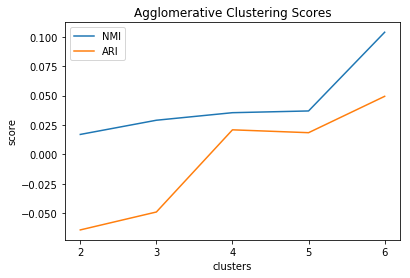

In [215]:
plot1, = plt.plot(clusters, ac_nmi)
plot2, = plt.plot(clusters, ac_ari)
plt.legend([plot1,plot2],["NMI", "ARI"])
plt.xlabel("clusters")
plt.ylabel("score")
plt.title('Agglomerative Clustering Scores')
plt.xticks(np.arange(2, 7, step=1))
plt.show()

clusters = 6 giving higher NMI and ARI scores for agglomerative clustering 

In [216]:
#Agglomerative Clustering (with ward linkage) 
db_nmi = []
db_ari = []
for i in db_dict:
    db_nmi.append(nmi(y_truth['label'],db_dict[i].fit_predict(all_data_scaled)))
    db_ari.append(ari(y_truth['label'],db_dict[i].fit_predict(all_data_scaled)))


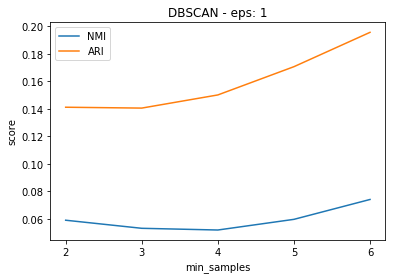

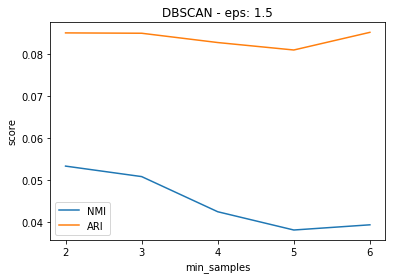

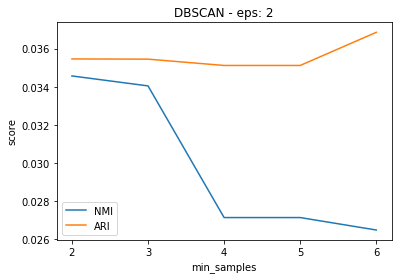

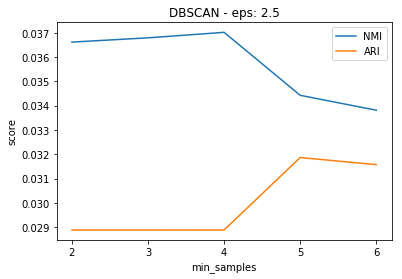

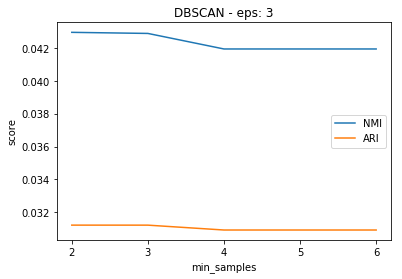

In [222]:
eps = [1,1.5,2,2.5,3]
min_samples = [2,3,4,5,6]
a = 0
for i in eps:
    plot1, = plt.plot(min_samples, db_nmi[a:a+5])
    plot2, = plt.plot(min_samples, db_ari[a:a+5])
    plt.legend([plot1,plot2],["NMI", "ARI"])
    plt.xlabel("min_samples")
    plt.ylabel("score")
    plt.title('DBSCAN - eps: '+str(i))
    plt.xticks(np.arange(min(min_samples), max(min_samples)+1, step=1))
    plt.show()
    a+=5

For different combinations, highest NMI and ARI scoreset combination is for eps = 1 and min_samples = 6 which is what we predicted earlier (task 2.1)